<a href="https://colab.research.google.com/github/CobbyHemade/Bitcoin-Price-Data/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [9]:
# Load the Bitcoin price dataset
df = pd.read_csv('/content/bitcoin_price copy.csv')

In [10]:
 # Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [12]:
# Define the feature and target variables
dataset = df['Close'].values.reshape(-1, 1)

In [13]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

In [14]:
# Split the data into training and testing sets
training_size = int(len(dataset_scaled) * 0.8)
test_size = len(dataset_scaled) - training_size
train_data, test_data = dataset_scaled[0:training_size, :], dataset_scaled[training_size:len(dataset_scaled), :]


In [15]:
# Define a function to create a dataset with lookback
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
# Create the training and testing datasets with lookback
look_back = 10
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [18]:
# Reshape the data to fit the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
69/69 [==============================] - 9s 21ms/step - loss: 0.0011
Epoch 2/100
69/69 [==============================] - 1s 20ms/step - loss: 2.1144e-04
Epoch 3/100
69/69 [==============================] - 1s 19ms/step - loss: 1.6520e-04
Epoch 4/100
69/69 [==============================] - 1s 20ms/step - loss: 1.6735e-04
Epoch 5/100
69/69 [==============================] - 2s 24ms/step - loss: 1.7010e-04
Epoch 6/100
69/69 [==============================] - 2s 32ms/step - loss: 1.4844e-04
Epoch 7/100
69/69 [==============================] - 2s 23ms/step - loss: 1.5316e-04
Epoch 8/100
69/69 [==============================] - 1s 20ms/step - loss: 1.3429e-04
Epoch 9/100
69/69 [==============================] - 1s 19ms/step - loss: 1.3899e-04
Epoch 10/100
69/69 [==============================] - 1s 20ms/step - loss: 1.1711e-04
Epoch 11/100
69/69 [==============================] - 1s 20ms/step - loss: 1.2652e-04
Epoch 12/100
69/69 [==============================] - 1s 20ms/step 

In [22]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)


17/17 [==============================] - 2s 7ms/step


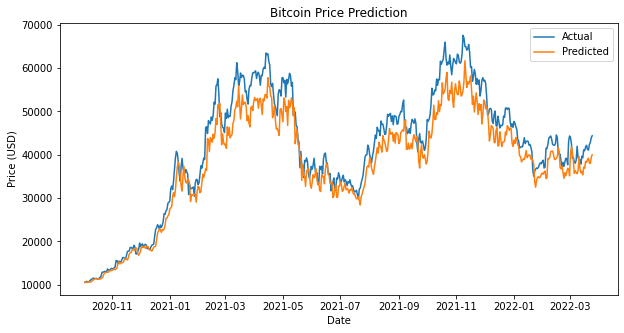

In [23]:
# Visualize the predicted Bitcoin price
plt.figure(figsize=(10,5))
plt.plot(df.index[training_size+look_back+1:], dataset[training_size+look_back+1:], label='Actual')
plt.plot(df.index[training_size+look_back+1:], y_pred, label='Predicted')
plt.legend()
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()